In [2]:
import pandas as pd

In [3]:
crimes = pd.read_csv('../data/crimes.csv', low_memory=False)


In [4]:
crimes.shape

(7643707, 22)

In [11]:
crimes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7643707 entries, 0 to 7643706
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [12]:
# read slim 2022 crimes csv data
crimes_df = pd.read_csv('../data/crimes-2022-slim.csv.zip',
  parse_dates=['Date'],
  cache_dates=True,
  low_memory=False)


In [13]:
crimes_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201432 entries, 0 to 201431
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  201432 non-null  datetime64[ns]
 1   Block                 201432 non-null  object        
 2   Primary Type          201432 non-null  object        
 3   Description           201432 non-null  object        
 4   Location Description  200857 non-null  object        
 5   Arrest                201432 non-null  bool          
 6   Domestic              201432 non-null  bool          
 7   Beat                  201432 non-null  int64         
 8   District              201432 non-null  int64         
 9   Ward                  201422 non-null  float64       
 10  Community Area        201432 non-null  int64         
 11  Latitude              200034 non-null  float64       
 12  Longitude             200034 non-null  float64       
dtyp

In [20]:
# get crime types
crime_types = crimes[['Primary Type']]

# get crime counts by primary type
crime_type_total = crime_types.groupby('Primary Type').size()

# get arrests and domestic counts for each primary crime type
crime_type_counts = crimes[['Primary Type', 'Arrest', 'Domestic']]\
    .groupby('Primary Type').sum()

# add crime type totals column
crime_type_counts['Total'] = crime_type_total

# print all crime stats (arrests, domestic, and totals)
crime_type_counts.sort_values(by='Total', ascending=False).style

,Arrest,Domestic,Total
Primary Type,,,
THEFT,182305,43183,1612023
BATTERY,309617,611740,1401115
CRIMINAL DAMAGE,59079,73851,871255
NARCOTICS,739675,303,744105
ASSAULT,106672,113023,495960
OTHER OFFENSE,83782,142432,475452
BURGLARY,24009,3584,420155
MOTOR VEHICLE THEFT,30470,2130,357647
DECEPTIVE PRACTICE,46021,3815,334363


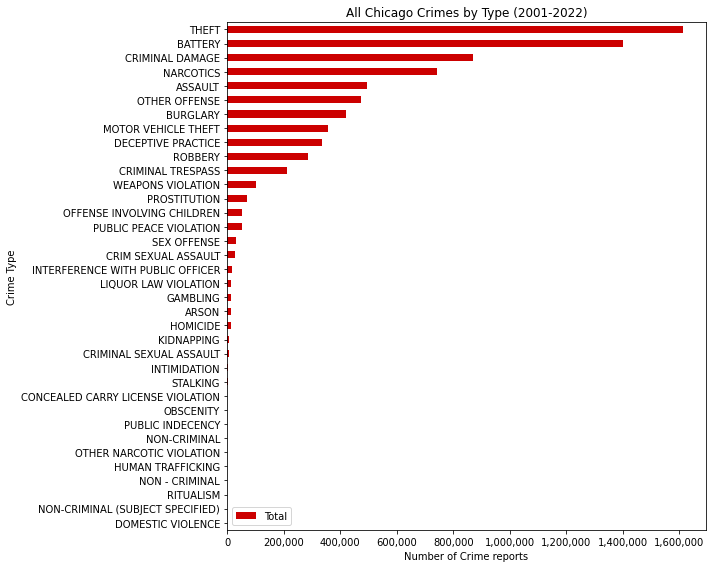

In [22]:
# plot crimes by primary type counts
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

all_crime_types = crime_type_counts.sort_values(by='Total', ascending=True)\
    .drop(['Arrest', 'Domestic'], axis=1)  # denotes column

all_crime_types.plot(kind='barh', figsize=(10, 8), color='#cc0000')
plt.title('All Chicago Crimes by Type (2001-2022)')
plt.xlabel('Number of Crime reports')
plt.ylabel('Crime Type')
plt.tight_layout()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

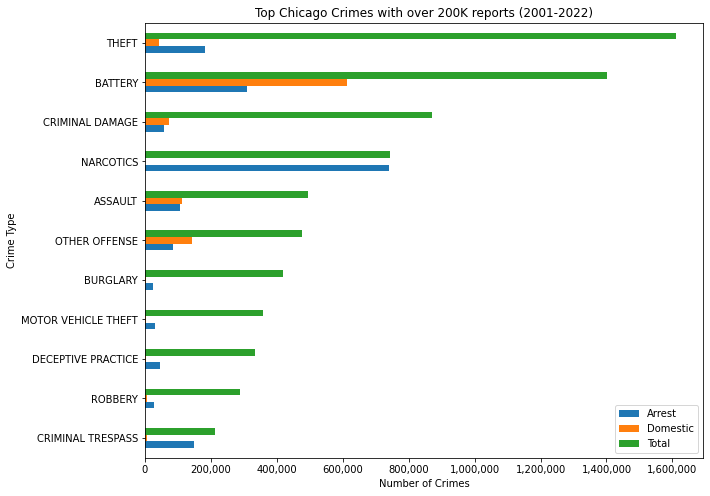

In [25]:
# plot top crimes (>-= 200,000 reports)
crime_type_counts[crime_type_counts['Total'] >= 200000].sort_values(by='Total', ascending=True)\
    .plot(kind='barh', figsize=(10, 8))
plt.title('Top Chicago Crimes with over 200K reports (2001-2022)')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [27]:
# get narcotics crimes
narcotics = crimes[crimes['Primary Type'] == 'NARCOTICS']
#print(narcotics.head())

# get narcotics crime description counts
narcotics_crimes = narcotics[['Primary Type', 'Description']]\
    .groupby('Description').count()\
    .sort_values(by='Primary Type', ascending=False)

print(narcotics_crimes.head(10))
print('...')
print('Total Narcotics Crime Descriptions: {}'.format(len(narcotics_crimes)))

                                Primary Type
Description                                 
POSS: CANNABIS 30GMS OR LESS          278139
POSS: CRACK                           121112
POSS: HEROIN(WHITE)                    95786
SOLICIT NARCOTICS ON PUBLICWAY         27854
MANU/DELIVER: HEROIN (WHITE)           26446
POSS: COCAINE                          25470
MANU/DELIVER:CRACK                     24949
ATTEMPT POSSESSION NARCOTICS           21366
FOUND SUSPECT NARCOTICS                19502
POSS: CANNABIS MORE THAN 30GMS         19092
...
Total Narcotics Crime Descriptions: 80


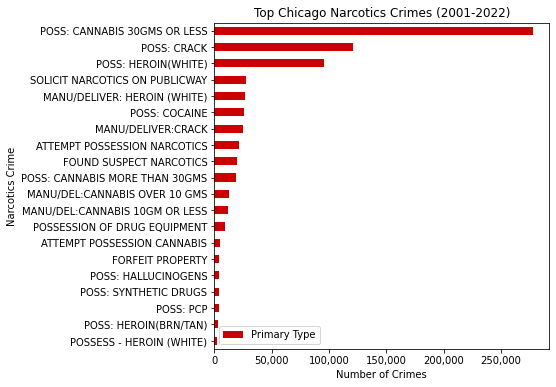

In [35]:
# plot top 20 narcotics crimes
narcotics_crimes[:20].sort_values(by='Primary Type', ascending=True)\
    .plot(kind='barh', figsize=(6, 6), color='#cc0000')
plt.title('Top Chicago Narcotics Crimes (2001-2022)')
plt.xlabel('Number of Crimes')
plt.ylabel('Narcotics Crime')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [32]:
# get other offenses crimes
other_offenses = crimes[crimes['Primary Type'] == 'OTHER OFFENSE']
#print(other_offenses.head())

# get other offense crime description counts
other_offense_crimes = other_offenses[['Primary Type', 'Description']]\
    .groupby('Description').count()\
    .sort_values(by='Primary Type', ascending=False)

print(other_offense_crimes.head(10))
print('...')
print('Total Other Offense Crime Descriptions: {}'.format(len(other_offense_crimes)))

                                Primary Type
Description                                 
TELEPHONE THREAT                      148121
HARASSMENT BY TELEPHONE               109798
OTHER VEHICLE OFFENSE                  40624
VIOLATE ORDER OF PROTECTION            39829
HARASSMENT BY ELECTRONIC MEANS         33313
FALSE/STOLEN/ALTERED TRP               21866
OTHER CRIME INVOLVING PROPERTY         12499
OTHER CRIME AGAINST PERSON              8657
VEHICLE TITLE/REG OFFENSE               8504
LICENSE VIOLATION                       8366
...
Total Other Offense Crime Descriptions: 63


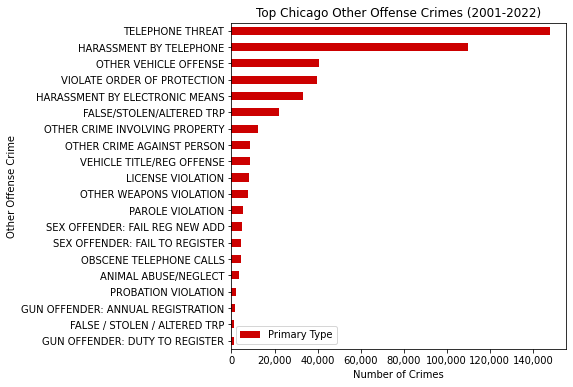

In [34]:
# plot top 20 other offense crimes
other_offense_crimes[:20].sort_values(by='Primary Type', ascending=True)\
    .plot(kind='barh', figsize=(6, 6), color='#cc0000')
plt.title('Top Chicago Other Offense Crimes (2001-2022)')
plt.xlabel('Number of Crimes')
plt.ylabel('Other Offense Crime')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()